In [91]:
from numpy import genfromtxt
import pandas as pd
import numpy as np
from subprocess import check_call
from datetime import datetime
import importlib
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import math
from mpl_toolkits.mplot3d import Axes3D
import pdb
import pickle
from DebugObjectModule import DebugObject

---
## With all data, no lines

In [129]:
df = pd.read_csv(r'./data/data_for_thesis_plot.csv', skiprows=[])
df

,ɑ,η = 1.0000,η = 0.9995,η = 0.9950,η = 0.9900,η = 0.9800,η = 0.9500,Average,Pos Error,Neg Error
0,0.010,0.0,0.01604,0.34671,0.82103,0.99821,NaN,0.54550,0.45271,0.52946
1,0.050,0.0,0.00293,0.03435,0.08541,0.23745,0.81241,0.23451,0.57790,0.23158
2,0.100,0.0,0.00095,0.01265,0.03031,0.07723,0.31627,0.08748,0.22879,0.08653
3,0.200,0.0,0.00028,0.00382,0.00890,0.02137,0.08558,0.02399,0.06159,0.02371
4,0.500,0.0,-0.00013,-0.00122,-0.00219,-0.00353,-0.00362,-0.00214,0.00201,0.00148
5,0.524,0.0,-0.00014,-0.00142,-0.00268,-0.00453,-0.00601,-0.00296,0.00281,0.00306
6,0.785,0.0,-0.00019,-0.00272,-0.00536,-0.01049,-0.02345,-0.00844,0.00825,0.01501
7,1.571,0.0,-0.00015,-0.00057,-0.00157,-0.00355,-0.01070,-0.00331,0.00316,0.00739


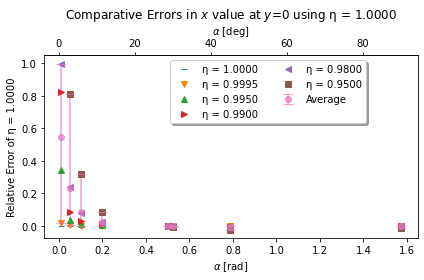

In [135]:
fig1, ax1 = plt.subplots(1)
ax1.set_xlabel(r"$\alpha$ [rad]")
ax1.set_ylabel(r"Relative Error of η = 1.0000")
ax1.set_title(f"Comparative Errors in $x$ value at $y$=0 using η = 1.0000")
ax1.ticklabel_format(style='plain', axis='y',useOffset=False)

alpha_val = 1.0

ax1.plot(df["ɑ"], df["η = 1.0000"],"_", label='η = 1.0000', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9995"],"v", label='η = 0.9995', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9950"],"^", label='η = 0.9950', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9900"],">", label='η = 0.9900', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9800"],"<", label='η = 0.9800', alpha =alpha_val)
ax1.plot(df["ɑ"], df["η = 0.9500"],"s", label='η = 0.9500', alpha =alpha_val) 
ax1.errorbar(df["ɑ"], df["Average"],yerr=[df["Neg Error"],df["Pos Error"]],fmt="o",capsize=5, label='Average',alpha =0.7)


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


secax = ax1.secondary_xaxis('top', functions=(rad2deg, deg2rad))

ax1.legend(loc='upper center', bbox_to_anchor=(0.6, 1.0),
          ncol=2, fancybox=True, shadow=True)
secax.set_xlabel(r'$\alpha$ [deg]')


fig1.tight_layout()
fig1.savefig("Comparative-Error-Plot-Group_Velocity.pdf")
fig1.savefig("Comparative-Error-Plot-Group_Velocity.png")

---
## With all data, with lines

In [136]:
df = pd.read_csv(r'./data/data_for_thesis_plot.csv', skiprows=[])
df

,ɑ,η = 1.0000,η = 0.9995,η = 0.9950,η = 0.9900,η = 0.9800,η = 0.9500,Average,Pos Error,Neg Error
0,0.010,0.0,0.01604,0.34671,0.82103,0.99821,NaN,0.54550,0.45271,0.52946
1,0.050,0.0,0.00293,0.03435,0.08541,0.23745,0.81241,0.23451,0.57790,0.23158
2,0.100,0.0,0.00095,0.01265,0.03031,0.07723,0.31627,0.08748,0.22879,0.08653
3,0.200,0.0,0.00028,0.00382,0.00890,0.02137,0.08558,0.02399,0.06159,0.02371
4,0.500,0.0,-0.00013,-0.00122,-0.00219,-0.00353,-0.00362,-0.00214,0.00201,0.00148
5,0.524,0.0,-0.00014,-0.00142,-0.00268,-0.00453,-0.00601,-0.00296,0.00281,0.00306
6,0.785,0.0,-0.00019,-0.00272,-0.00536,-0.01049,-0.02345,-0.00844,0.00825,0.01501
7,1.571,0.0,-0.00015,-0.00057,-0.00157,-0.00355,-0.01070,-0.00331,0.00316,0.00739


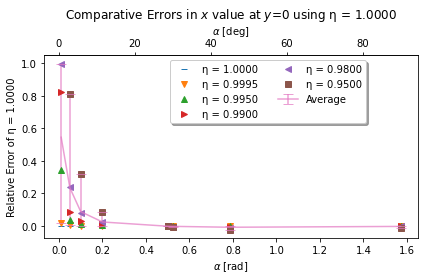

In [141]:
fig1, ax1 = plt.subplots(1)
ax1.set_xlabel(r"$\alpha$ [rad]")
ax1.set_ylabel(r"Relative Error of η = 1.0000")
ax1.set_title(f"Comparative Errors in $x$ value at $y$=0 using η = 1.0000")
ax1.ticklabel_format(style='plain', axis='y',useOffset=False)

alpha_val = 1.0

ax1.plot(df["ɑ"], df["η = 1.0000"],"_", label='η = 1.0000', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9995"],"v", label='η = 0.9995', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9950"],"^", label='η = 0.9950', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9900"],">", label='η = 0.9900', alpha =alpha_val) 
ax1.plot(df["ɑ"], df["η = 0.9800"],"<", label='η = 0.9800', alpha =alpha_val)
ax1.plot(df["ɑ"], df["η = 0.9500"],"s", label='η = 0.9500', alpha =alpha_val) 
ax1.errorbar(df["ɑ"], df["Average"],yerr=[df["Neg Error"],df["Pos Error"]],capsize=5, label='Average',alpha =0.7)


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


secax = ax1.secondary_xaxis('top', functions=(rad2deg, deg2rad))

ax1.legend(loc='upper center', bbox_to_anchor=(0.6, 1.0),
          ncol=2, fancybox=True, shadow=True)
secax.set_xlabel(r'$\alpha$ [deg]')


fig1.tight_layout()
fig1.savefig("Comparative-Error-Plot-Group_Velocity-withlines.pdf")
fig1.savefig("Comparative-Error-Plot-Group_Velocity-withlines.png")

---
## Removing $\alpha = 90^{\circ}$

In [138]:
df2 = pd.read_csv(r'./data/data_for_thesis_plot.csv', skiprows=[8])
df2

,ɑ,η = 1.0000,η = 0.9995,η = 0.9950,η = 0.9900,η = 0.9800,η = 0.9500,Average,Pos Error,Neg Error
0,0.010,0.0,0.01604,0.34671,0.82103,0.99821,NaN,0.54550,0.45271,0.52946
1,0.050,0.0,0.00293,0.03435,0.08541,0.23745,0.81241,0.23451,0.57790,0.23158
2,0.100,0.0,0.00095,0.01265,0.03031,0.07723,0.31627,0.08748,0.22879,0.08653
3,0.200,0.0,0.00028,0.00382,0.00890,0.02137,0.08558,0.02399,0.06159,0.02371
4,0.500,0.0,-0.00013,-0.00122,-0.00219,-0.00353,-0.00362,-0.00214,0.00201,0.00148
5,0.524,0.0,-0.00014,-0.00142,-0.00268,-0.00453,-0.00601,-0.00296,0.00281,0.00306
6,0.785,0.0,-0.00019,-0.00272,-0.00536,-0.01049,-0.02345,-0.00844,0.00825,0.01501


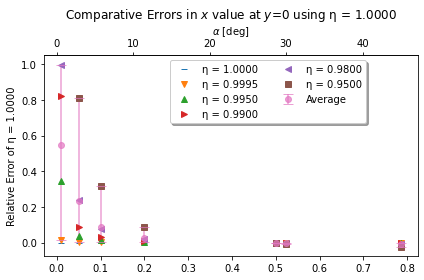

In [140]:
fig3, ax3 = plt.subplots(1)
ax1.set_xlabel(r"$\alpha$ [rad]")
ax3.set_ylabel(r"Relative Error of η = 1.0000")
ax3.set_title(f"Comparative Errors in $x$ value at $y$=0 using η = 1.0000")
ax3.ticklabel_format(style='plain', axis='y',useOffset=False)

alpha_val = 1.0

ax3.plot(df2["ɑ"], df2["η = 1.0000"],"_", label='η = 1.0000', alpha =alpha_val) 
ax3.plot(df2["ɑ"], df2["η = 0.9995"],"v", label='η = 0.9995', alpha =alpha_val) 
ax3.plot(df2["ɑ"], df2["η = 0.9950"],"^", label='η = 0.9950', alpha =alpha_val) 
ax3.plot(df2["ɑ"], df2["η = 0.9900"],">", label='η = 0.9900', alpha =alpha_val) 
ax3.plot(df2["ɑ"], df2["η = 0.9800"],"<", label='η = 0.9800', alpha =alpha_val)
ax3.plot(df2["ɑ"], df2["η = 0.9500"],"s", label='η = 0.9500', alpha =alpha_val) 
ax3.errorbar(df2["ɑ"], df2["Average"],yerr=[df2["Neg Error"],df2["Pos Error"]],fmt="o",capsize=5, label='Average',alpha =0.7)


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


secax = ax3.secondary_xaxis('top', functions=(rad2deg, deg2rad))

ax3.legend(loc='upper center', bbox_to_anchor=(0.6, 1.0),
          ncol=2, fancybox=True, shadow=True)
secax.set_xlabel(r'$\alpha$ [deg]')

fig3.tight_layout()
fig3.savefig("Comparative-Error-Plot-Group_Velocity-no90deg.pdf")
fig3.savefig("Comparative-Error-Plot-Group_Velocity-no90deg.png")